## Web and Social Project Code

using Python 2.7

In [64]:
%matplotlib inline
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [65]:
data  = open("Data/msnbc990928.seq")

In [66]:
lines = data.readlines()

In [67]:
lines[:10]

['1 1 \n',
 '2 \n',
 '3 2 2 4 2 2 2 3 3 \n',
 '5 \n',
 '1 \n',
 '6 \n',
 '1 1 \n',
 '6 \n',
 '6 7 7 7 6 6 8 8 8 8 \n',
 '6 9 4 4 4 10 3 10 5 10 4 4 4 \n']

## Data

In [68]:
data2 = [lin.strip().split() for lin in lines]
data2[:5]    

[['1', '1'],
 ['2'],
 ['3', '2', '2', '4', '2', '2', '2', '3', '3'],
 ['5'],
 ['1']]

In [69]:
len_line=[len(lin) for lin in data2]
print len_line[:5]
print sum(len_line)/len(len_line)

[2, 1, 9, 1, 1]
4


In [70]:
pd.DataFrame(len_line).describe().to_csv("Orig_metrics.csv")

## Most Common Landing Page

In [71]:
first_pages  =  [lin[0] for lin in data2]
first_pages[:10]

['1', '2', '3', '5', '1', '6', '1', '6', '6', '6']

In [72]:
Counter(first_pages).most_common()

[('1', 277376),
 ('6', 163077),
 ('2', 77138),
 ('8', 71828),
 ('3', 66554),
 ('9', 65278),
 ('13', 62986),
 ('12', 56742),
 ('14', 53639),
 ('4', 51040),
 ('11', 14275),
 ('10', 12790),
 ('15', 7377),
 ('5', 4226),
 ('7', 3557),
 ('17', 1509),
 ('16', 426)]

In [73]:
first_pages_dict = Counter(first_pages)

## Scatter plot to show frequency of page when it is a landing page

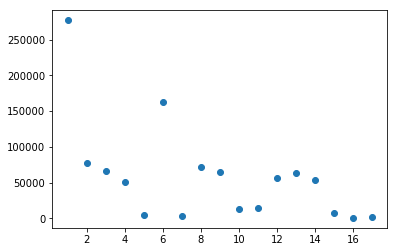

In [74]:
plt.scatter(x = list(first_pages_dict.keys()), y=list(first_pages_dict.values()))
plt.show()

## Scatter plot to show frequency of page when it is an exit page

In [75]:
last_pages  =  [lin[-1] for lin in data2]
last_pages[:10]

['1', '2', '3', '5', '1', '6', '1', '6', '8', '4']

In [76]:
Counter(last_pages).most_common()

[('1', 181521),
 ('6', 145726),
 ('2', 97694),
 ('14', 80697),
 ('3', 79857),
 ('8', 73116),
 ('4', 69541),
 ('12', 65778),
 ('13', 56236),
 ('9', 52655),
 ('10', 23121),
 ('11', 22485),
 ('5', 12626),
 ('7', 12582),
 ('15', 11740),
 ('17', 3401),
 ('16', 1042)]

In [77]:
last_pages_dict = Counter(last_pages)

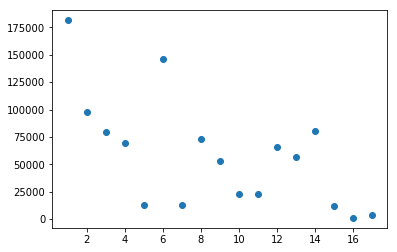

In [78]:
plt.scatter(x = list(last_pages_dict.keys()), y=list(last_pages_dict.values()))
plt.show()

In [79]:
da = np.array(data2)

## Max and Min No of Page Views

In [80]:
cnt = Counter(np.concatenate(da))

In [81]:
cnt.most_common()

[('1', 940469),
 ('2', 452387),
 ('8', 439398),
 ('6', 414928),
 ('14', 395880),
 ('4', 386217),
 ('7', 305615),
 ('12', 264899),
 ('13', 216125),
 ('3', 207479),
 ('9', 196614),
 ('5', 151409),
 ('10', 131760),
 ('11', 96817),
 ('15', 56576),
 ('16', 25249),
 ('17', 16972)]

In [82]:
sorted(Counter(np.concatenate(da)).keys())

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [83]:
np.concatenate(da).shape

(4698794L,)

In [84]:
pages = ['1','2', '3', '4', '5', '6','7', '8', '9', '10', 
         '11', '12', '13', '14', '15', '16', '17']

## Exit Rate

In [85]:
exit_rate={}
for page in pages:
    # Number of times a page appears in the sequence
    page_true = len([lin for lin in data2 if page in lin ])
    # Number of times a page is an exit page
    exit_pages_no = len([lin for lin in data2 if page == lin[-1] ])
    exit_rate[page] = exit_pages_no / (page_true*1.0)
exit_rate

{'1': 0.5796041266871235,
 '10': 0.4568825830929139,
 '11': 0.39038491588103547,
 '12': 0.5863455247229973,
 '13': 0.7308312106877372,
 '14': 0.6773405630445366,
 '15': 0.40205479452054793,
 '16': 0.5004803073967339,
 '17': 0.30901326549155006,
 '2': 0.5573405748319888,
 '3': 0.6548446878997606,
 '4': 0.5713241153805075,
 '5': 0.5053027574338657,
 '6': 0.6712359685123513,
 '7': 0.15627095908786048,
 '8': 0.7646917324687549,
 '9': 0.5838100940216427}

In [86]:
tab = pd.DataFrame()

In [87]:
tab['pages'] = sorted(exit_rate.keys())
tab

,pages
0,1
1,10
2,11
3,12
4,13
5,14
6,15
7,16
8,17
9,2


In [88]:
tab['exit_rate']=[exit_rate[i] for i in sorted(exit_rate.keys())]
tab.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
pages,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
exit_rate,0.579604,0.456883,0.390385,0.586346,0.730831,0.677341,0.402055,0.50048,0.309013,0.557341,0.654845,0.571324,0.505303,0.671236,0.156271,0.764692,0.58381


## Bounce Rate

In [89]:
bounce_rate={}
for page in pages:
    # Number of times a page is bounced
    bounce_pages_no = len([lin for lin in data2 if len(lin)==1 and lin[0] == page])
    # Number of times a page is a potential bounce
    page_b_true = len([lin for lin in data2 if lin[0]==page])
    bounce_rate[page] = bounce_pages_no / (page_b_true*1.0)
bounce_rate

{'1': 0.20748730964467005,
 '10': 0.453948397185301,
 '11': 0.49422066549912436,
 '12': 0.4495964188784322,
 '13': 0.29065189089638965,
 '14': 0.3778034638975372,
 '15': 0.36044462518639014,
 '16': 0.13615023474178403,
 '17': 0.46587143803843606,
 '2': 0.4656330213383806,
 '3': 0.6323286353938156,
 '4': 0.3860501567398119,
 '5': 0.22243256034074776,
 '6': 0.5629549231344703,
 '7': 0.04357604723081248,
 '8': 0.2358550982903603,
 '9': 0.3059530010110604}

In [90]:
tab['bounce_rate']=[bounce_rate[i] for i in sorted(bounce_rate.keys())]

In [91]:
tab['page_counts']=[cnt[i] for i in sorted(cnt.keys())]

In [92]:
tab.set_index('pages').T.describe()

pages,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,313489.929030,43920.303610,32272.628202,88300.011981,72042.007161,131960.351715,18858.920833,8416.545544,5657.591628,150796.007658,69160.095724,128739.319125,50469.909245,138309.744730,101871.733282,146466.333516,65538.296588
std,542979.803101,76071.408534,55897.065649,152939.209907,124779.532052,228561.119973,32663.948715,14577.333168,9798.565079,261185.460921,119787.684926,222982.212545,87415.816829,239558.436214,176446.844828,253686.264749,113514.888974
min,0.207487,0.453948,0.390385,0.449596,0.290652,0.377803,0.360445,0.136150,0.309013,0.465633,0.632329,0.386050,0.222433,0.562955,0.043576,0.235855,0.305953
25%,0.393546,0.455415,0.442303,0.517971,0.510742,0.527572,0.381250,0.318315,0.387442,0.511487,0.643587,0.478687,0.363868,0.617095,0.099924,0.500273,0.444882
50%,0.579604,0.456883,0.494221,0.586346,0.730831,0.677341,0.402055,0.500480,0.465871,0.557341,0.654845,0.571324,0.505303,0.671236,0.156271,0.764692,0.583810
75%,470234.789802,65880.228441,48408.747110,132449.793173,108062.865416,197940.338670,28288.201027,12624.750240,8486.232936,226193.778670,103739.827422,193108.785662,75704.752651,207464.335618,152807.578135,219699.382346,98307.291905
max,940469.000000,131760.000000,96817.000000,264899.000000,216125.000000,395880.000000,56576.000000,25249.000000,16972.000000,452387.000000,207479.000000,386217.000000,151409.000000,414928.000000,305615.000000,439398.000000,196614.000000


In [93]:
tab.to_csv("metrics.csv")
tab.set_index('pages').T.describe().to_csv("metrics_desc.csv")

In [94]:
tab.set_index('pages').T

pages,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
exit_rate,0.579604,0.456883,0.390385,0.586346,0.730831,0.677341,0.402055,0.50048,0.309013,0.557341,0.654845,0.571324,0.505303,0.671236,0.156271,0.764692,0.583810
bounce_rate,0.207487,0.453948,0.494221,0.449596,0.290652,0.377803,0.360445,0.13615,0.465871,0.465633,0.632329,0.386050,0.222433,0.562955,0.043576,0.235855,0.305953
page_counts,940469.000000,131760.000000,96817.000000,264899.000000,216125.000000,395880.000000,56576.000000,25249.00000,16972.000000,452387.000000,207479.000000,386217.000000,151409.000000,414928.000000,305615.000000,439398.000000,196614.000000


In [95]:
tab.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
pages,1,10,11,12,13,14,15,16,17,2,3,4,5,6,7,8,9
exit_rate,0.579604,0.456883,0.390385,0.586346,0.730831,0.677341,0.402055,0.50048,0.309013,0.557341,0.654845,0.571324,0.505303,0.671236,0.156271,0.764692,0.58381
bounce_rate,0.207487,0.453948,0.494221,0.449596,0.290652,0.377803,0.360445,0.13615,0.465871,0.465633,0.632329,0.38605,0.222433,0.562955,0.043576,0.235855,0.305953
page_counts,940469,131760,96817,264899,216125,395880,56576,25249,16972,452387,207479,386217,151409,414928,305615,439398,196614


## Incidence Matrix Code

In [96]:
incidence_matrix= np.zeros((len(pages), len(pages)))

## Pages Name

In [97]:
pages_name = "frontpage news tech local opinion on-air misc weather msn-news health living business msn-sports sports summary bbs travel".split()
pages_name, len(pages_name)

(['frontpage',
  'news',
  'tech',
  'local',
  'opinion',
  'on-air',
  'misc',
  'weather',
  'msn-news',
  'health',
  'living',
  'business',
  'msn-sports',
  'sports',
  'summary',
  'bbs',
  'travel'],
 17)

## Mapping Pages and Page Names

In [98]:
mapping = dict(zip(pages, range(len(pages))))
mapping

{'1': 0,
 '10': 9,
 '11': 10,
 '12': 11,
 '13': 12,
 '14': 13,
 '15': 14,
 '16': 15,
 '17': 16,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8}

In [99]:
 map_df = pd.DataFrame([i for i in sorted(mapping.values())])

In [100]:
mapping_original = dict((zip(range(len(pages_name)), pages_name)))
mapping_original
map_df['pages']=[mapping_original[i] for i in sorted(mapping_original.keys())]
map_df.to_csv("mappings.csv")

## Create an incidence matrix based on co-occurrence

In [101]:
incidence_matrix= np.zeros((len(pages), len(pages)))

for line in data2:  # For Each seq in the file
    length = len(line)
    if length>=2:
        #print line
        for i in range(length-1):  # for each element in the file 
            tmp = (line[i], line[i+1])
            incidence_matrix[mapping[tmp[0]], mapping[tmp[1]]]+=1
                        #print k, j , tmp

print(incidence_matrix.shape)

(17L, 17L)


In [102]:
incidence_matrix.mean(), incidence_matrix.min(), incidence_matrix.max()

(12833.826989619378, 2.0, 418764.0)

In [103]:
incidence_matrix.shape

(17L, 17L)

In [104]:
matrix2 = incidence_matrix >= incidence_matrix.mean() 
matrix2.shape

(17L, 17L)

In [105]:
G = nx.from_numpy_matrix(incidence_matrix)

In [106]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 17\nNumber of edges: 153\nAverage degree:  18.0000'

In [107]:
G = nx.relabel_nodes(G, mapping_original)

In [108]:
type(G)

networkx.classes.graph.Graph

In [109]:
G.is_directed()

False

In [110]:
G.degree()

{'bbs': 18,
 'business': 18,
 'frontpage': 18,
 'health': 18,
 'living': 18,
 'local': 18,
 'misc': 18,
 'msn-news': 18,
 'msn-sports': 18,
 'news': 18,
 'on-air': 18,
 'opinion': 18,
 'sports': 18,
 'summary': 18,
 'tech': 18,
 'travel': 18,
 'weather': 18}

In [111]:
nx.degree_centrality(G)

{'bbs': 1.125,
 'business': 1.125,
 'frontpage': 1.125,
 'health': 1.125,
 'living': 1.125,
 'local': 1.125,
 'misc': 1.125,
 'msn-news': 1.125,
 'msn-sports': 1.125,
 'news': 1.125,
 'on-air': 1.125,
 'opinion': 1.125,
 'sports': 1.125,
 'summary': 1.125,
 'tech': 1.125,
 'travel': 1.125,
 'weather': 1.125}

In [112]:
nx.betweenness_centrality(G)

{'bbs': 0.0,
 'business': 0.0,
 'frontpage': 0.0,
 'health': 0.0,
 'living': 0.0,
 'local': 0.0,
 'misc': 0.0,
 'msn-news': 0.0,
 'msn-sports': 0.0,
 'news': 0.0,
 'on-air': 0.0,
 'opinion': 0.0,
 'sports': 0.0,
 'summary': 0.0,
 'tech': 0.0,
 'travel': 0.0,
 'weather': 0.0}

In [113]:
nx.eigenvector_centrality(G)

{'bbs': 0.0018782060340221552,
 'business': 0.09233920257281239,
 'frontpage': 0.933321057431501,
 'health': 0.037720117095723725,
 'living': 0.04780256673655106,
 'local': 0.1304093050103966,
 'misc': 0.12055332568325554,
 'msn-news': 0.039991529399408206,
 'msn-sports': 0.01812715653915491,
 'news': 0.21550720023014666,
 'on-air': 0.08406226647317083,
 'opinion': 0.021046191744813994,
 'sports': 0.14137687053677783,
 'summary': 0.013849055576218535,
 'tech': 0.05238695782987897,
 'travel': 0.00893955314944579,
 'weather': 0.0790567058733306}

In [114]:
G.edges(data=True)[:10]

[('living', 'living', {'weight': 30540.0}),
 ('living', 'health', {'weight': 1619.0}),
 ('living', 'business', {'weight': 1765.0}),
 ('living', 'msn-news', {'weight': 1231.0}),
 ('living', 'bbs', {'weight': 18.0}),
 ('living', 'travel', {'weight': 1611.0}),
 ('living', 'misc', {'weight': 643.0}),
 ('living', 'sports', {'weight': 1300.0}),
 ('living', 'weather', {'weight': 677.0}),
 ('living', 'tech', {'weight': 1816.0})]

In [115]:
nx.connectivity.average_node_connectivity(G)

16.0

In [116]:
nx.closeness_centrality(G)

{'bbs': 1.0,
 'business': 1.0,
 'frontpage': 1.0,
 'health': 1.0,
 'living': 1.0,
 'local': 1.0,
 'misc': 1.0,
 'msn-news': 1.0,
 'msn-sports': 1.0,
 'news': 1.0,
 'on-air': 1.0,
 'opinion': 1.0,
 'sports': 1.0,
 'summary': 1.0,
 'tech': 1.0,
 'travel': 1.0,
 'weather': 1.0}

In [117]:
list(nx.clique.find_cliques(G))

[['living',
  'business',
  'msn-news',
  'local',
  'travel',
  'bbs',
  'misc',
  'sports',
  'summary',
  'frontpage',
  'weather',
  'health',
  'msn-sports',
  'news',
  'opinion',
  'tech',
  'on-air']]

In [118]:
nx.pagerank(G, alpha=1)

{'bbs': 0.006807932645815664,
 'business': 0.05448915984549583,
 'frontpage': 0.1841684385756045,
 'health': 0.030369670693450382,
 'living': 0.020425315111847073,
 'local': 0.09158061353673108,
 'misc': 0.0833460829673811,
 'msn-news': 0.0401054688618776,
 'msn-sports': 0.04210037907021639,
 'news': 0.0963474343023641,
 'on-air': 0.06841148193729074,
 'opinion': 0.03967421823125348,
 'sports': 0.08766641250469052,
 'summary': 0.012454180730978405,
 'tech': 0.036311940469893465,
 'travel': 0.003769151620772956,
 'weather': 0.10197211889433672}

## Graph based on Incidence matrix with threshod

In [119]:
thres = incidence_matrix.mean()
thres

12833.826989619378

In [120]:
G = nx.from_numpy_matrix(incidence_matrix>=thres)

In [121]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 17\nNumber of edges: 28\nAverage degree:   3.2941'

In [122]:
G = nx.relabel_nodes(G, mapping_original)

In [123]:
type(G)

networkx.classes.graph.Graph

In [124]:
G.is_directed()

False

In [125]:
deg = G.degree()

In [126]:
dc = nx.degree_centrality(G)

In [127]:
bc = nx.betweenness_centrality(G)

In [128]:
ec=nx.eigenvector_centrality(G)

In [129]:
cc=nx.closeness_centrality(G)

In [130]:
G.edges(data=True)[:10]

[('living', 'living', {'weight': True}),
 ('living', 'frontpage', {'weight': True}),
 ('msn-news', 'msn-news', {'weight': True}),
 ('business', 'frontpage', {'weight': True}),
 ('business', 'business', {'weight': True}),
 ('bbs', 'bbs', {'weight': True}),
 ('misc', 'misc', {'weight': True}),
 ('misc', 'local', {'weight': True}),
 ('misc', 'frontpage', {'weight': True}),
 ('misc', 'on-air', {'weight': True})]

In [131]:
list(nx.clique.find_cliques(G))

[['msn-news'],
 ['travel'],
 ['summary'],
 ['weather'],
 ['msn-sports', 'sports'],
 ['opinion'],
 ['bbs'],
 ['frontpage', 'living'],
 ['frontpage', 'business'],
 ['frontpage', 'misc', 'local'],
 ['frontpage', 'misc', 'on-air'],
 ['frontpage', 'sports'],
 ['frontpage', 'health'],
 ['frontpage', 'news'],
 ['frontpage', 'tech']]

In [132]:
pr = nx.pagerank(G, alpha=1, max_iter=1000)

In [133]:
nx.density(G)

0.20588235294117646

In [134]:
tabc = pd.DataFrame()

In [135]:
tabc['pages'] = sorted(G.nodes())
tabc = tabc.set_index('pages')
tabc.T

pages,bbs,business,frontpage,health,living,local,misc,msn-news,msn-sports,news,on-air,opinion,sports,summary,tech,travel,weather


In [136]:
tabc['degree_centrality']= [dc[i] for i in sorted(dc.keys())]
tabc

,degree_centrality
pages,
bbs,0.1250
business,0.1875
frontpage,0.6875
health,0.1875
living,0.1875
local,0.2500
misc,0.3125
msn-news,0.1250
msn-sports,0.1875


In [137]:
tabc['degree']= [deg[i] for i in sorted(deg.keys())]
tabc

,degree_centrality,degree
pages,,
bbs,0.1250,2
business,0.1875,3
frontpage,0.6875,11
health,0.1875,3
living,0.1875,3
local,0.2500,4
misc,0.3125,5
msn-news,0.1250,2
msn-sports,0.1875,3


In [138]:
tabc['betweeness_centrality']= [bc[i] for i in sorted(bc.keys())]
tabc

,degree_centrality,degree,betweeness_centrality
pages,,,
bbs,0.1250,2,0.000000
business,0.1875,3,0.000000
frontpage,0.6875,11,0.345833
health,0.1875,3,0.000000
living,0.1875,3,0.000000
local,0.2500,4,0.000000
misc,0.3125,5,0.004167
msn-news,0.1250,2,0.000000
msn-sports,0.1875,3,0.000000


In [139]:
tabc['eigenVector_centrality']= [ec[i] for i in sorted(ec.keys())]
tabc

,degree_centrality,degree,betweeness_centrality,eigenVector_centrality
pages,,,,
bbs,0.1250,2,0.000000,2.117537e-11
business,0.1875,3,0.000000,1.950023e-01
frontpage,0.6875,11,0.345833,6.527321e-01
health,0.1875,3,0.000000,1.950023e-01
living,0.1875,3,0.000000,1.950023e-01
local,0.2500,4,0.000000,3.082870e-01
misc,0.3125,5,0.004167,3.792012e-01
msn-news,0.1250,2,0.000000,2.117537e-11
msn-sports,0.1875,3,0.000000,6.396629e-02


In [140]:
tabc['closeness_centrality']= [cc[i] for i in sorted(cc.keys())]
tabc

,degree_centrality,degree,betweeness_centrality,eigenVector_centrality,closeness_centrality
pages,,,,,
bbs,0.1250,2,0.000000,2.117537e-11,0.000000
business,0.1875,3,0.000000,1.950023e-01,0.312500
frontpage,0.6875,11,0.345833,6.527321e-01,0.568182
health,0.1875,3,0.000000,1.950023e-01,0.312500
living,0.1875,3,0.000000,1.950023e-01,0.312500
local,0.2500,4,0.000000,3.082870e-01,0.328947
misc,0.3125,5,0.004167,3.792012e-01,0.347222
msn-news,0.1250,2,0.000000,2.117537e-11,0.000000
msn-sports,0.1875,3,0.000000,6.396629e-02,0.231481


In [141]:
tabc['page_rank']= [pr[i] for i in sorted(pr.keys())]
tabc

,degree_centrality,degree,betweeness_centrality,eigenVector_centrality,closeness_centrality,page_rank
pages,,,,,,
bbs,0.1250,2,0.000000,2.117537e-11,0.000000,6.250000e-02
business,0.1875,3,0.000000,1.950023e-01,0.312500,3.928373e-02
frontpage,0.6875,11,0.345833,6.527321e-01,0.568182,1.964223e-01
health,0.1875,3,0.000000,1.950023e-01,0.312500,3.928373e-02
living,0.1875,3,0.000000,1.950023e-01,0.312500,3.928373e-02
local,0.2500,4,0.000000,3.082870e-01,0.328947,5.892381e-02
misc,0.3125,5,0.004167,3.792012e-01,0.347222,7.856473e-02
msn-news,0.1250,2,0.000000,2.117537e-11,0.000000,6.250000e-02
msn-sports,0.1875,3,0.000000,6.396629e-02,0.231481,3.930232e-02


In [142]:
tabc.to_csv("Graph_metrics.csv")
tabc.describe().to_csv("Graph_metrics_desc.csv")

In [143]:
tabc.T

pages,bbs,business,frontpage,health,living,local,misc,msn-news,msn-sports,news,on-air,opinion,sports,summary,tech,travel,weather
degree_centrality,1.250000e-01,0.187500,0.687500,0.187500,0.187500,0.250000,0.312500,1.250000e-01,0.187500,0.187500,0.250000,1.250000e-01,0.250000,1.250000e-01,0.187500,0.000000e+00,1.250000e-01
degree,2.000000e+00,3.000000,11.000000,3.000000,3.000000,4.000000,5.000000,2.000000e+00,3.000000,3.000000,4.000000,2.000000e+00,4.000000,2.000000e+00,3.000000,0.000000e+00,2.000000e+00
betweeness_centrality,0.000000e+00,0.000000,0.345833,0.000000,0.000000,0.000000,0.004167,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.075000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
eigenVector_centrality,2.117537e-11,0.195002,0.652732,0.195002,0.195002,0.308287,0.379201,2.117537e-11,0.063966,0.195002,0.308287,2.117537e-11,0.214113,2.117537e-11,0.195002,0.000000e+00,2.117537e-11
closeness_centrality,0.000000e+00,0.312500,0.568182,0.312500,0.312500,0.328947,0.347222,0.000000e+00,0.231481,0.312500,0.328947,0.000000e+00,0.347222,0.000000e+00,0.312500,0.000000e+00,0.000000e+00
page_rank,6.250000e-02,0.039284,0.196422,0.039284,0.039284,0.058924,0.078565,6.250000e-02,0.039302,0.039284,0.058924,6.250000e-02,0.058944,6.250000e-02,0.039284,1.461291e-42,6.250000e-02


In [144]:
G.nodes()

['misc',
 'weather',
 'msn-sports',
 'living',
 'travel',
 'sports',
 'health',
 'bbs',
 'business',
 'news',
 'msn-news',
 'local',
 'summary',
 'tech',
 'opinion',
 'frontpage',
 'on-air']

## For Finding the suggestion Triads

In [145]:
def get_recommendation(pair, data):
    '''Find the most common triad for the given pair of pages, return as a list of values'''
    most_occured_page=[]
    occured_page=[]
    for line in data:
        if len(line)>=3:
            #print line
            length= len(line)
            for i in range(length):
                if i < length-2:
                    tmp = (line[i], line[i+1], line[i+2])
                    #print 'tmp', tmp, pair, set(tmp).intersection(set(pair))
                    if pair[0]==tmp[0] and pair[1]==tmp[1]:
                        #print pair, '-', tmp
                        most_occured_page.append(tmp[-1])
                        occured_page.append(tmp)    
    rec = Counter(occured_page)
    return rec.most_common()

In [146]:
pair =('6', '5')
get_recommendation(pair, data2)

[(('6', '5', '5'), 1172),
 (('6', '5', '6'), 323),
 (('6', '5', '8'), 234),
 (('6', '5', '2'), 164),
 (('6', '5', '1'), 113),
 (('6', '5', '11'), 67),
 (('6', '5', '15'), 65),
 (('6', '5', '10'), 61),
 (('6', '5', '16'), 42),
 (('6', '5', '7'), 40),
 (('6', '5', '3'), 35),
 (('6', '5', '12'), 32),
 (('6', '5', '14'), 23),
 (('6', '5', '4'), 21),
 (('6', '5', '9'), 13),
 (('6', '5', '17'), 6),
 (('6', '5', '13'), 2)]

In [147]:
pair = ("2", "5")
get_recommendation(pair, data2)

[(('2', '5', '5'), 1328),
 (('2', '5', '2'), 469),
 (('2', '5', '6'), 172),
 (('2', '5', '1'), 160),
 (('2', '5', '3'), 62),
 (('2', '5', '15'), 62),
 (('2', '5', '12'), 53),
 (('2', '5', '8'), 49),
 (('2', '5', '11'), 48),
 (('2', '5', '10'), 47),
 (('2', '5', '14'), 35),
 (('2', '5', '4'), 33),
 (('2', '5', '7'), 20),
 (('2', '5', '9'), 17),
 (('2', '5', '17'), 7),
 (('2', '5', '16'), 6),
 (('2', '5', '13'), 4)]

In [148]:
pd.DataFrame(get_recommendation(("2", "5"), data2)).to_csv("Recommend.csv")